# Проект: Принятие решений в бизнесе - A/B тест

Контекст <br>
Для крупного интернет-магазина вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.<br>
Основные этапы работы таковы: <br>
приоритизация гипотез, запуск A/B-тест и анализ результатов. <br>
<br>
## Часть 1. Приоритизация гипотез.<br>
<br>
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br>
Для приоритизации гипотез применим фреймворк ICE и фреймворк RICE. Отсортируем их по убыванию приоритета.<br>
Оценим разницу приоритизация гипотез при применении RICE вместо ICE.<br>
<br>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.set_option("max_colwidth", 999)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

ICE равен произведению показателей Impact и Confidence деленных на Efforts:

In [5]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


У ICE метода есть модификация RICE (R от англ. reach, «охват»): значение над дробью умножается на показатель Reach

In [6]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно методике ICE наиболее приоритетные гиоптезы под номерами: 8, 0, 7. <br>
По методике RICE наиболее приоритетные гипотезы: 7, 2, 0.  <br>
Приоритизация гипотез при применении RICE вместо ICE изменилась, потому что в расчеты стал учитываться охват пользователей, а у гипотез 7 и 2 этот показатель гораздо выше, чем у гипотез 8 и 0. 

## Часть 2. Анализ A/B-теста <br>
<br>
Мы проверили A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.<br>

Перед нами поставлена задача проанализировать A/B-тест, для этого определим: <br>
### Стабильность кумулятивных метрик
#### График кумулятивной выручки по группам. 


In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
visitors.duplicated().sum()

0

In [11]:
orders.duplicated().sum()

0

Пропусков нет. Дубликатов не выявлено. Выясним есть ли пользователи попавшие в обе группы:

In [12]:
visitorsA = orders[orders['group'] == 'A']['visitorId']
print('Количество покупателей в группе A:', visitorsA.nunique())
visitorsB = orders[orders['group'] == 'B']['visitorId']
print('Количество покупателей в группе B:',visitorsB.nunique())
visitorsAandB = pd.Series(np.intersect1d(visitorsA, visitorsB))
print('Пользователи, попавшие в обе группы:',len(visitorsAandB))

Количество покупателей в группе A: 503
Количество покупателей в группе B: 586
Пользователи, попавшие в обе группы: 58


Удалим данные о пользователях, попавших в обе группы:

In [13]:
orders= orders[orders.visitorId.isin (visitorsAandB) == False ]

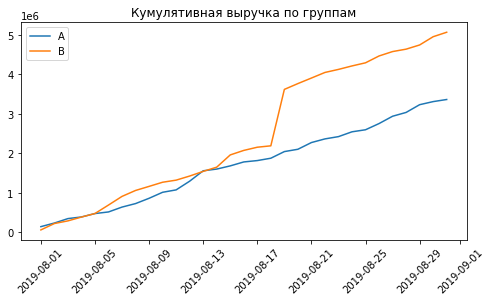

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize = (8,4))
plt.title("Кумулятивная выручка по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=45);

Выручка почти равномерно увеличивается в течение всего теста.
Однако графики выручки обеих групп в нескольких точках (для группы А 12 августа, для группы В - существенно 18 августа) резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позднее.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

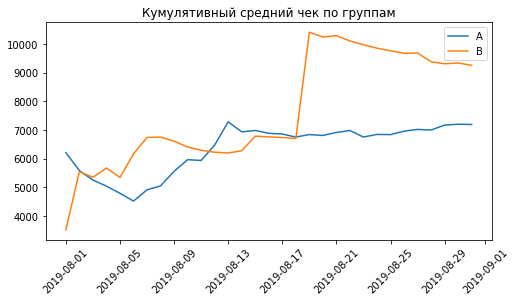

In [15]:
plt.figure(figsize = (8,4))
plt.title("Кумулятивный средний чек по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45);

В группе наблюдается резкий скачек значения в группе В. Видимо это курпные заказы. Такое онамальное значение искажает значение среднего чека по группе. Графики к концу теста стабилизировались, но по группе А с тенденцией к росту, по группе В - к снижению.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

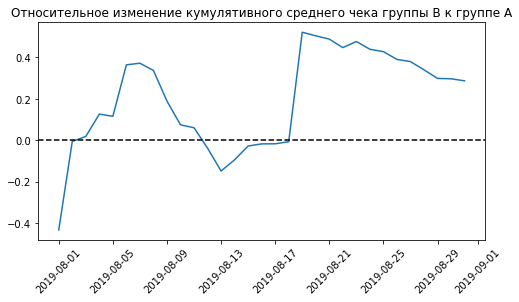

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (8,4))
plt.title("Относительное изменение кумулятивного среднего чека группы В к группе А")
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45);

Очевидны значительные изменения в нескольких датах, когда судя по всему и были совершены аномальные заказы.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения

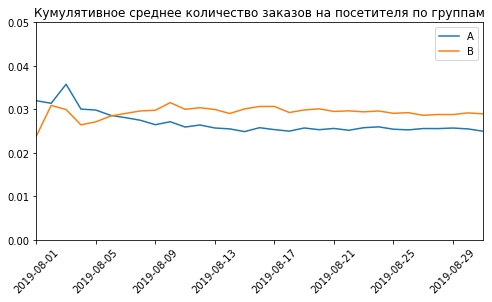

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (8,4))
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.xticks(rotation=45);

Группы колебались вначале, но затем конверсия группы В превысила конверсию А, которая снизилась. Оба показателя зафиксировались.

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

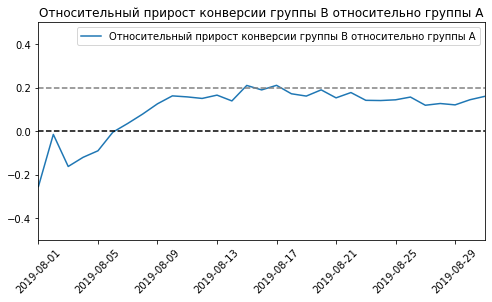

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (8,4))
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xticks(rotation=45);

В начале теста значение конверсии группы B было меньше, чем в группе A, затем ситуация изменилась. Потом конверсия группы В снова падала, но в конце теста немножко подросла.

### Анализ выбросов и всплесков

#### Постройте точечный график количества заказов по пользователям. 

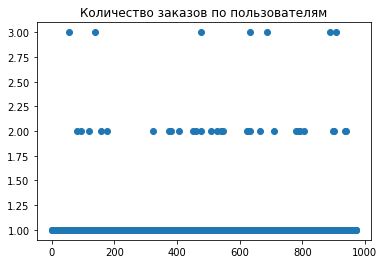

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

plt.figure(figsize = (6,4))
plt.title("Количество заказов по пользователям")
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) ;

Пользователей, заказавших более 2 раз, мало. Для того, что определить аномальные значения посчитаем выборочные перцентили количества заказов на одного пользователя.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [20]:
np.percentile(ordersByUsers['orders'], [ 95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 1 заказов, и не более 1% - больше 2.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

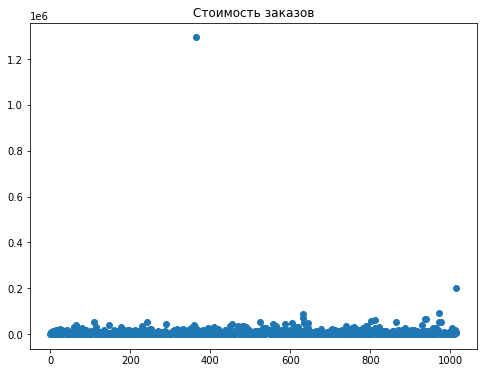

In [21]:
plt.figure(figsize = (8,6))
plt.title("Стоимость заказов")
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Есть буквально два дорогих заказа. По графику можно понять, что большинство заказов стоят не более 100 тысяч.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [22]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

### Анализ A/B-теста

Ранее мы:<br>
Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;<br>
Увидели выбросы и нашли границу для их определения.<br>

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами (по "сырым" данным).

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [24]:
print("P-value различия конверсий между группами по сырым данным:{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии между группами по сырым данным:{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value различия конверсий между группами по сырым данным:0.01102
Относительный прирост конверсии между группами по сырым данным:0.160


P-value (0.01102) значительно меньше 0.05 - первую гипотезу отвергаем(о том, что статистически значимых различий в среднем числе заказов между группами нет), значит в среднем количестве заказов между группами есть статистически значимые различия. <br>
Относительный прирост среднего группы В к конверсии группы А равен 16%.<br>

#### Статистическая значимость различий в среднем чеке заказа между группами (по «сырым» данным). 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [25]:
print('P-value различия среднего чека между группами по сырым данным:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека между группами по сырым данным:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value различия среднего чека между группами по сырым данным:0.829
Относительный прирост среднего чека между группами по сырым данным:0.287


Р-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие в 28.7% не является статистическим значимым. <br>
#### Подготовка очищенных от аномалий данных.

In [26]:
orders_lim = 1
revenue_lim = 26700

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Всего 86 аномальных пользователя. Оценим, как их действия повлияли на результаты теста. <br>

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами (по «очищенным» данным).

После очистки данных от аномальных пользователей сформулируем гипотезы. <br>
Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [29]:
print('P-value различия конверсий между группами по очищенным данным: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии между группами по очищенным данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value различия конверсий между группами по очищенным данным: 0.01593
Относительный прирост конверсии между группами по очищенным данным: 0.174


Гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет отвергаем.
Группа В демонстрирует лучшие результаты, чем группа А. Статистическая значимость достигнута. <br>

#### Статистическая значимость различий в среднем чеке заказа между группами (по «очищенным» данным).  <br>

Также проверим статистическую значимость различий в среднем чеке между сегментами после очистки данных от аномалий. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [30]:
print(
    'P-value различия среднего чека между группами по очищенным данным: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека между группами по очищенным данным: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value различия среднего чека между группами по очищенным данным: 0.727
Относительный прирост среднего чека между группами по очищенным данным: -0.034


P-value увеличился и по прежнему больше 0.05 - значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Разница между сегментами существенно изменилась с 29% до -3%, но она не является статистически значимой

### Результаты теста.<br>

Результаты проделанной работы:<br>

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Как по сырым так и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий различия среднего чека изменилось в пользу группы A.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A.<br>

В дальнейшем проведение теста смысла нет. Его необходимо остановить и признать победу группы B, так как все ее показатели (кроме среднего чека по очищенным данным) преобладают над группой A.